# Lesson 07: Hadley and Walker circulations, integration

The last exercise was dedicated to the derivation of atmospheric data fields. In Lesson 05 we computed the geostrophic wind out of the geopotential field. In Exercise 06 we computed the Ekman pumping due to wind stress over the oceans. Today we will learn how to integrate over an atmospheric column and use this new tool to compute the stream functions of the Hadley and Walker circulations.

## Import the packages

This did not change:

In [1]:
# Define the tools we are going to need today
%matplotlib inline
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xray  # NetCDF library
import cartopy  # Plotting libary
import cartopy.crs as ccrs  # Projections
# Some defaults
plt.rcParams['figure.figsize'] = (14, 5)  # Default plot size
np.set_printoptions(threshold=20)  # avoid to print very large arrays on screen
# The commands below are not important
import warnings
warnings.filterwarnings('ignore')

## For loops in python 

Until today we have not used a single for loop for our exercises. This is because numpy is made to work with multi-dimensional arrays without having to apply operations over array elements. For today's lesson however we will need one for loop, and you will also need them in your future work if you choose python as your language of choice (which I strongly recommend of course). 

For loops are a bit different (and better) in python than in Matlab. It is best explained with an example:

In [2]:
alist = [1, 2, 'three', 4, 'end']
for element in alist:
    print(element)

1
2
three
4
end


In python loops, there is no index (the famous "i" in many programming languages). The "i" is not necessary because python's `for` loop is executed *over the elements* of the list. Some languages implement this syntax under the name "foreach" ("for each element in list: do something").

Note the blank spaces before "print()". In python the spacing (it's called "[indentation](http://www.python-course.eu/python3_blocks.php)") is important!

Let's study a couple of further examples:

In [ ]:
text = 'Hello!'
for letter in text:
    print(letter)

In [ ]:
for i in range(5):
    print(i)

In [ ]:
for i in range(len(text)):
    print(text[i])

Python for loops can also work like Matlab ones, with an "i". But most of the times, the "i" index is not necessary. If you think you need an "i", it is *probable* that you could also do it without it.

Now lets have a look at a 2D array:

In [3]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [4]:
print(a.shape)

(3, 4)


The array "a" has three rows and 4 columns. What will the following do?

In [5]:
for row in a:
    print(row)

[1 2 3 4]
[5 6 7 8]
[ 9 10 11 12]


And the following?

In [6]:
for row in a:
    for column in row:
        print(column)

1
2
3
4
5
6
7
8
9
10
11
12


What will the following do?

In [7]:
for i, row in enumerate(a):
    print(i, row, a[i])

0 [1 2 3 4] [1 2 3 4]
1 [5 6 7 8] [5 6 7 8]
2 [ 9 10 11 12] [ 9 10 11 12]


We will now compute the cumulative sum of all elements of a row in a:

In [8]:
for i, row in enumerate(a):
    a[i] = np.cumsum(row)
a

array([[ 1,  3,  6, 10],
       [ 5, 11, 18, 26],
       [ 9, 19, 30, 42]])

OK, that's enough for loops for today. Let's go back to our reanaysis data first!

## Read the data

Today we are going to use the upper-level atmospheric data we used last week: ``ERA-Int-MonthlyAvg-4D-UVWZ.nc``. You will find it on OLAT or in the scratch directory(``/scratch/c707/c7071047/data``). Open the file and explore it.

In [9]:
netcdf = xray.open_dataset('./data/ERA-Int-MonthlyAvg-4D-UVWZ.nc')

## Vertical velocity

**E: compute the annual average of the vertical component of the wind. Plot the 500hPa level on a map.**

**Q: discuss the features of the plot. Order of magnitude of w in comparison to u and v? Where are the largest velocities? Look at the sign of w in the tropics and the subtropics. Does it make sense?**

In [10]:
w = - netcdf.w.mean(dim='month')

AttributeError: Unknown property aspect

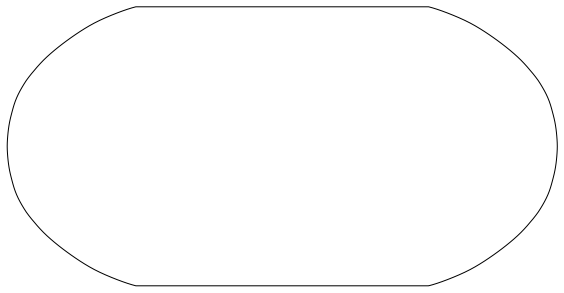

In [11]:
ax = plt.axes(projection=ccrs.Robinson())
w.sel(level=900).plot(ax=ax, origin='upper', aspect='equal', transform=ccrs.PlateCarree(), vmin=-0.2, vmax=0.2) 
ax.coastlines();

**E: multiply w by -1 to make positive velocities point upwards. Plot the 850hPa level on a map with the vmin=-0.2 and vmax=0.2 keywords. Can you try to explain the negative w velocities over the ice sheets (this was not treated in the course)? Some features are expected such as the ITCZ, but some are strange. What can you say about the w field in general?**

## Zonal averages of the meridional and vertical wind components

Let's compute the zonal averages of the meridional and vertical components of the wind:

In [ ]:
v = netcdf.v.mean(dim=['month', 'longitude'])
w = - netcdf.w.mean(dim=['month', 'longitude'])

**E: make a countour plot (.plot.contourf()) of v and w. Be sure that the vertical levels showing upwards (plt.ylim([1000, 50])). Select the levels appropriatly, for example np.linspace(-2, 2, 21) for v and np.linspace(-0.1, 0.1, 21) for w.**

**Q: discuss the plots. Do they correspond to your expectations from the lecture?**

In [ ]:
w.plot.contourf(levels=np.linspace(-0.1, 0.1, 21))
plt.ylim([1000, 50]);

In [ ]:
v.plot.contourf(levels=np.linspace(-2, 2, 21))
plt.ylim([1000, 50]);

Not that u and w are the components of a wind vector in the meridional plane. As such they could be represented by arrows:

In [ ]:
pv, pw = v[:, ::7], w[:, ::7]
qv = plt.quiver(pv.latitude, pv.level, pv.values, pw.values)
plt.ylim([1000, 50]);
plt.xlim([-90, 90]);

**Q: discuss the quiver plot above. Is it easy to interpret? For which reason?**

## Stream function and Hadley circulation

### A few equations to define the stream function

In the meridional plane and since we have averaged over all longitudes, the continuity equation reduces to:
    
$$ \nabla \cdot [\vec{V}] = \frac{\partial [v]}{\partial y} + \frac{\partial [w]}{\partial p} = 0 $$

Where the brackets denote the zonal average. In spherical pressure coordinates the same continuity equation writes 

$$ \frac{1}{R \cos \varphi} \frac{\partial \left( [v] \cos \varphi \right)}{\partial \varphi} + \frac{\partial [w]}{\partial p} = 0 $$

This equation is very useful since any convergence in the horizontal meridional flow must be balanced by divergence in the vertical flow. In other words: only one variable ($[v]$ or $[w]$) is needed to define the flow in the plane. With a little bit of mathematical manipulation, a [stream function](https://en.wikipedia.org/wiki/Stream_function) can be used for this purpose.

Let's define the funtion $\Psi$ such that the continuity equation above is satisfied:

$$[v] = \frac{g}{2 \pi R \cos \varphi} \frac{\partial \Psi}{\partial p}$$

and

$$[w] = - \frac{g}{2 \pi R^2 \cos \varphi} \frac{\partial \Psi}{\partial \varphi}$$

(note that $g$ is added so that $\Psi$ is of unit kg s$^{-1}$, a mass flux).

So $\Psi$ could be defined from either $w$ or $v$. Since $w$ in the atmosphere is very small, noisy, and subject to observational errors we will use $[v]$ to compute it. Integrating the equation above from the tropopause (where \Psi is assumed to be zero) *down* to some level $p$ gives:

$$ \Psi (\varphi, p) = \frac{2 \pi R \cos \varphi}{g} \int_{p_{trop}}^{p} [v(\varphi, p)] dp $$

The integral above can be computed numerically from our $[v]$ field. $\Psi (\varphi, p) $ is a mass transport (kg s$^{-1}$) equal to the rate at which mass is transported merdionally in the region between the level $p$ and the tropopause by the zonal mean circulation.

### Back to python: numerical integration

How to integrate the geophysical field $[v]$? Like derivation, numerical integration is a thing that computers now how to do. Here again we are going to use a numpy [function](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.trapz.html) for it. You learn in more detail how the numerical integration works in another course. The purpose of our exercises is to "demistify" a litte bit these operations which can be quite simple to use in python.

**Q: read the documentation of the numpy function trapz().** Interested students can read about the trapezoidal rule in [wikipedia](https://en.wikipedia.org/wiki/Trapezoidal_rule) for example.

First we are going to prepare a container for $\Psi$, where we will put the results of our computations:

In [ ]:
psi_data = v * 0  # psi_data is of the same dimensions as v: (level, latitude)

We have to integrate up to level $p$ for each level in the original data. This is why we need a for loop. Here as an example:

In [ ]:
for p in psi_data.level.values:
    print('We will integrate from level 50 to level: {}'.format(p))

For each levels we will select only the data we need for the integration, compute it, and then store it in our container variable:

In [ ]:
for p in psi_data.level.values:
    # select parts of v we want to integrate
    sel_v = v.sel(level=slice(50, p))
    # the z coordinates of [v] for the integral:
    zcoords = sel_v.level * 100  # note the "* 100" to convert hPa into SI units!
    # integrate the v values over the atmospheric column (axis=0), with the pressure coordinates sel_v.level
    integral = np.trapz(sel_v, zcoords, axis=0)
    # store the results (".loc[p]" is equivalent to ".sel(level=p)")
    psi_data.loc[p] = integral

The loop above might be a bit complicated to understand. Don't hesitate to ask me for more details!

Finally, we need to compute the factor $ \frac{2 \pi R \cos \varphi}{g} $ and multiply it to our integral:

In [ ]:
fac = 2 * np.pi * 6371000 * np.cos(np.deg2rad(v.latitude)) / 9.81
psi = psi_data * fac
# Convert to Sverdrups:
psi = psi / 1e9
psi.name = '10$^9$ kg s$^{-1}$'

All done! Let's plot the result:

In [ ]:
psi.plot.contourf(levels=np.linspace(-100, 100, 21), extend='both')
plt.title('Stream function of the meridional overturning circulation -- annual average')
plt.ylim([1000, 50]);

Remember that the sream function plotted above is a function representation of a 2D flow. The w component of the wind is propotional to $- \frac{\partial \Psi}{\partial \varphi}$, the v component is propotional to $\frac{\partial \Psi}{\partial p}$

**Q: describe the meridional overturning circulation represented above. Name the cells you can recognise and describe their circulation. Compare the ciirculation as described by $\Psi$ to the v and w plots you made in section "Zonal averages of the meridional and vertical wind components" above.**

**E: repeat the operations above but this time for the months of January and of July. Describe the differences bewteen the two months and the annual average.** 

*Bonus exercice to do at home if you want: can you make a "for loop" that plots all 12 months in 12 different figures?*

In [ ]:
for m in np.arange(1, 13):
    v = netcdf.v.sel(month=m).mean(dim='longitude')
    psi_data = v * 0 
    for p in psi_data.level.values:
        # select parts of v we want to integrate
        sel_v = v.sel(level=slice(50, p))
        # the z coordinates of [v] for the integral:
        zcoords = sel_v.level * 100  # note the "* 100" to convert hPa into SI units!
        # integrate the v values over the atmospheric column (axis=0), with the pressure coordinates sel_v.level
        integral = np.trapz(sel_v, zcoords, axis=0)
        # store the results (".loc[p]" is equivalent to ".sel(level=p)")
        psi_data.loc[p] = integral
    fac = 2 * np.pi * 6371000 * np.cos(np.deg2rad(v.latitude)) / 9.81
    psi = psi_data * fac
    # Convert to Sverdrups:
    psi = psi / 1e9
    psi.name = '10$^9$ kg s$^{-1}$'
    
    plt.figure()
    psi.plot.contourf(levels=np.linspace(-200, 200, 21), extend='both')
    plt.title('Stream function of the meridional overturning circulation -- month: {}'.format(m))
    plt.ylim([1000, 50]);

## Equatorial Walker circulation

We have seen that we could represent the averaged Hadley circulation with only one information (the meridional wind v) and the use of a stream function. The Walker circulation is also a thermal circulation, with the difference that it takes place at the equator. Is it also possible to visualize the Walker circulation with the help of a stream function?

### u and w zonal plots 

We will now focus on a small band around the equator. Let's select this data and average it over time and latitudes:

In [ ]:
u = netcdf.u.sel(latitude=slice(5, -5)).mean(dim=['month', 'latitude'])
w = - netcdf.w.sel(latitude=slice(5, -5)).mean(dim=['month', 'latitude'])

**E: make a countour plot of u and w. Discuss the features of the winds. Where are the updrafts? Downdrafts? Which are stronger? Can you recognise the features of the Walker circulation we described in the lecture?**

Approximative location of the oceans/continents:
- 150E -> 80W: Pacific Ocean
- 80W -> 40W: South-America
- 40W -> 10E: Atlantic Ocean
- 10E -> 40E: Africa
- 40E -> 100E: Indian Ocean
- 100E -> 150E: Indonesia

In [ ]:
w.plot.contourf(levels=np.linspace(-0.1, 0.1, 21))
plt.ylim([1000, 50]);

In [ ]:
u.plot.contourf(levels=np.linspace(-15, 15, 21))
plt.ylim([1000, 50]);

**Note: the analyses below can only be done on the university computers (they require packages which are not installed on your laptops). They are a bit more complicated (just a bit) and go a bit beyond the lecture requirements. You can see them as beiing "faculative".**

### Divergent components of the wind vector

Although the rough features of the Walker circulation are visible from the plots above, computing the stream function from u is not as straight forward as it was with the zonal average of v. First, the latitudinal band selected around the equator is not a closed system and the continuity assumptions presented above are not valid in the ($\lambda$, $p$) plane. Second, the equatorial zonal plane is a "loop": the flow can be continuous around the globe (and it is, to some extent, at certain altitudes), thus masking the Walker circulation. Therefore, climatologists have defined a better way to define the equatorial Walker circulation. We will describe this step below. 

In [ ]:
# This package is only available at the university
import climate

In [ ]:
# Read the u and v winds
u = netcdf.u.mean(dim='month')
v = netcdf.v.mean(dim='month')
# compute the rotational and irrrotational components of the wind
urot, vrot = climate.rotationalcomponent(u, v)
uirot, virot = climate.irrotationalcomponent(u, v)

What did we just do? The [Helmholtz's theorem](https://en.wikipedia.org/wiki/Helmholtz_decomposition) states that any sufficiently smooth vector field can be decomposed into the sum of an irrotational (curl-free) vector field and a solenoidal (divergence-free)

In [ ]:
uchi.sel(latitude=slice(5, -5)).mean(dim=['latitude']).plot.contourf(levels=np.linspace(-3, 3, 21))
plt.ylim([1000, 50]);

In [ ]:
pu, pv = uchi.sel(level=900)[::7, ::7], vchi.sel(level=900)[::7, ::7]
ax = plt.axes(projection=ccrs.PlateCarree())
qv = ax.quiver(pu.longitude, pu.latitude, pu, pv, transform=ccrs.PlateCarree())
ax.coastlines();

In [ ]:
v = netcdf.u.sel(latitude=slice(5, -5)).mean(dim=['month', 'latitude'])
psi_data = v * 0 
for p in psi_data.level.values:
    # select parts of v we want to integrate
    sel_v = v.sel(level=slice(50, p))
    # the z coordinates of [v] for the integral:
    zcoords = sel_v.level * 100  # note the "* 100" to convert hPa into SI units!
    # integrate the v values over the atmospheric column (axis=0), with the pressure coordinates sel_v.level
    integral = np.trapz(sel_v, zcoords, axis=0)
    # store the results (".loc[p]" is equivalent to ".sel(level=p)")
    psi_data.loc[p] = integral
fac = 2 * np.pi * 6371000 / 9.81
psi = psi_data * fac
# Convert to Sverdrups:
psi = psi / 1e9
psi.name = '10$^9$ kg s$^{-1}$'

plt.figure()
psi.plot.contourf()
plt.title('Stream function of the meridional overturning circulation -- month: {}'.format(m))
plt.ylim([1000, 50]);

In [ ]:
u = netcdf.u

In [ ]:
dims = list(u.dims)
dims.remove('latitude')
dims.remove('longitude')
dims

In [ ]:
import climate

In [ ]:
u = netcdf.u.mean(dim='month')
v = netcdf.v.mean(dim='month')
uchi, vchi = climate.irrotationalcomponent(u, v)

In [ ]:
pu, pv = uchi.sel(level=200)[::7, ::7], vchi.sel(level=200)[::7, ::7]
ax = plt.axes(projection=ccrs.PlateCarree())
qv = ax.quiver(pu.longitude, pu.latitude, pu, pv, transform=ccrs.PlateCarree())
ax.coastlines();

In [ ]:
w = - netcdf.w.sel(latitude=slice(5, -5)).mean(dim=['month', 'latitude'])
u = uchi.sel(latitude=slice(5, -5)).mean(dim=['latitude'])

In [ ]:
# u = u - u.mean(dim='longitude')

In [ ]:
pu, pw = u[:, ::7], w[:, ::7]
qv = plt.quiver(pu.longitude, pu.level, pu.values*0, pw.values)
plt.ylim([1000, 50]);

In [ ]:
pu, pw = u[:, ::7], w[:, ::7]
qv = plt.quiver(pu.longitude, pu.level, pu.values, pw.values*0)
plt.ylim([1000, 50]);

In [ ]:
cont = u.values*0
for i, p in enumerate(u.level.values):
    cont[i] = np.trapz(u.sel(level=slice(50, p)).values, u.sel(level=slice(50, p)).level.values * 100, axis=0)

In [ ]:
fac = 2 * np.pi * 6371000 / 9.81

In [ ]:
cont = u * 0 + cont 
phi = cont * fac / (10**9)

In [ ]:
phi.plot.contourf(levels=np.linspace(-200, 200,21))
plt.ylim([1000, 50]);

In [ ]:
du  = u.values
du.shape

In [ ]:
du = np.hstack([du, du[:,[0]]])
du = (du[:, 1:] - du[:, :-1])

In [ ]:
u = u*0 + du